In [1]:
# from google.colab import drive

In [2]:
# drive.mount('/content/drive')

In [3]:
pip install imblearn

In [4]:
##  Importing Necessary Libraries 

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [5]:
# Reading our Data using Pandas DataFrame

# df = pd.read_csv('/content/drive/MyDrive/EXL Project/spotify_tracks_metadata.csv')
df = pd.read_csv('D:\Rishabh\EXL Project\spotify_tracks_metadata.csv')

In [6]:
df.head()

,Unnamed: 0,spotify_id,song_name,artist_name,song_popularity,album_release_date,album_release_year,album_release_month,analysis_url,acousticness,...,loudness,mode,song_explicit,speechiness,tempo,time_signature,total_available_markets,track_href,uri,valence
0,0,7lPN2DXiMsVn7XUKtOW1CS,drivers license,Olivia Rodrigo,100,2021-01-08,2021.0,1.0,https://api.spotify.com/v1/audio-analysis/7lPN...,0.72100,...,-8.761,1.0,True,0.0601,143.874,4.0,170,https://api.spotify.com/v1/tracks/7lPN2DXiMsVn...,spotify:track:7lPN2DXiMsVn7XUKtOW1CS,0.132
1,1,5QO79kh1waicV47BqGRL3g,Save Your Tears,The Weeknd,96,2020-03-20,2020.0,3.0,https://api.spotify.com/v1/audio-analysis/5QO7...,0.02120,...,-5.487,1.0,True,0.0309,118.051,4.0,170,https://api.spotify.com/v1/tracks/5QO79kh1waic...,spotify:track:5QO79kh1waicV47BqGRL3g,0.644
2,2,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,The Weeknd,96,2020-03-20,2020.0,3.0,https://api.spotify.com/v1/audio-analysis/0VjI...,0.00146,...,-5.934,1.0,False,0.0598,171.005,4.0,170,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,0.334
3,3,3tjFYV6RSFtuktYl3ZtYcq,Mood (feat. iann dior),24kGoldn,95,2020-07-24,2020.0,7.0,https://api.spotify.com/v1/audio-analysis/3tjF...,0.22100,...,-3.558,0.0,True,0.0369,90.989,4.0,170,https://api.spotify.com/v1/tracks/3tjFYV6RSFtu...,spotify:track:3tjFYV6RSFtuktYl3ZtYcq,0.756
4,4,27OeeYzk6klgBh83TSvGMA,WITHOUT YOU,The Kid LAROI,94,2020-11-06,2020.0,11.0,https://api.spotify.com/v1/audio-analysis/27Oe...,0.21300,...,-7.357,1.0,True,0.0299,93.005,4.0,170,https://api.spotify.com/v1/tracks/27OeeYzk6klg...,spotify:track:27OeeYzk6klgBh83TSvGMA,0.467


# Data Exploration & Pre-Processing


In [7]:
df.shape # shows our DataFrame is structured as 439893 X 26 matrix or table, simply put.

(439893, 26)

In [8]:
df.info() # Displays the Count values, Data types etc. associated with each feature.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439893 entries, 0 to 439892
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               439893 non-null  int64  
 1   spotify_id               439893 non-null  object 
 2   song_name                439891 non-null  object 
 3   artist_name              439884 non-null  object 
 4   song_popularity          439893 non-null  int64  
 5   album_release_date       439893 non-null  object 
 6   album_release_year       439690 non-null  float64
 7   album_release_month      420559 non-null  float64
 8   analysis_url             439893 non-null  object 
 9   acousticness             439893 non-null  float64
 10  danceability             439893 non-null  float64
 11  duration_ms              439893 non-null  float64
 12  energy                   439893 non-null  float64
 13  instrumentalness         439893 non-null  float64
 14  key 

In [9]:
df.isnull().sum() # Detecting Null aka Missing Values present in our DataFrame

Unnamed: 0                     0
spotify_id                     0
song_name                      2
artist_name                    9
song_popularity                0
album_release_date             0
album_release_year           203
album_release_month        19334
analysis_url                   0
acousticness                   0
danceability                   0
duration_ms                    0
energy                         0
instrumentalness               0
key                            0
liveness                       0
loudness                       0
mode                           0
song_explicit                  0
speechiness                    0
tempo                          0
time_signature                 0
total_available_markets        0
track_href                     0
uri                            0
valence                        0
dtype: int64

<AxesSubplot:>

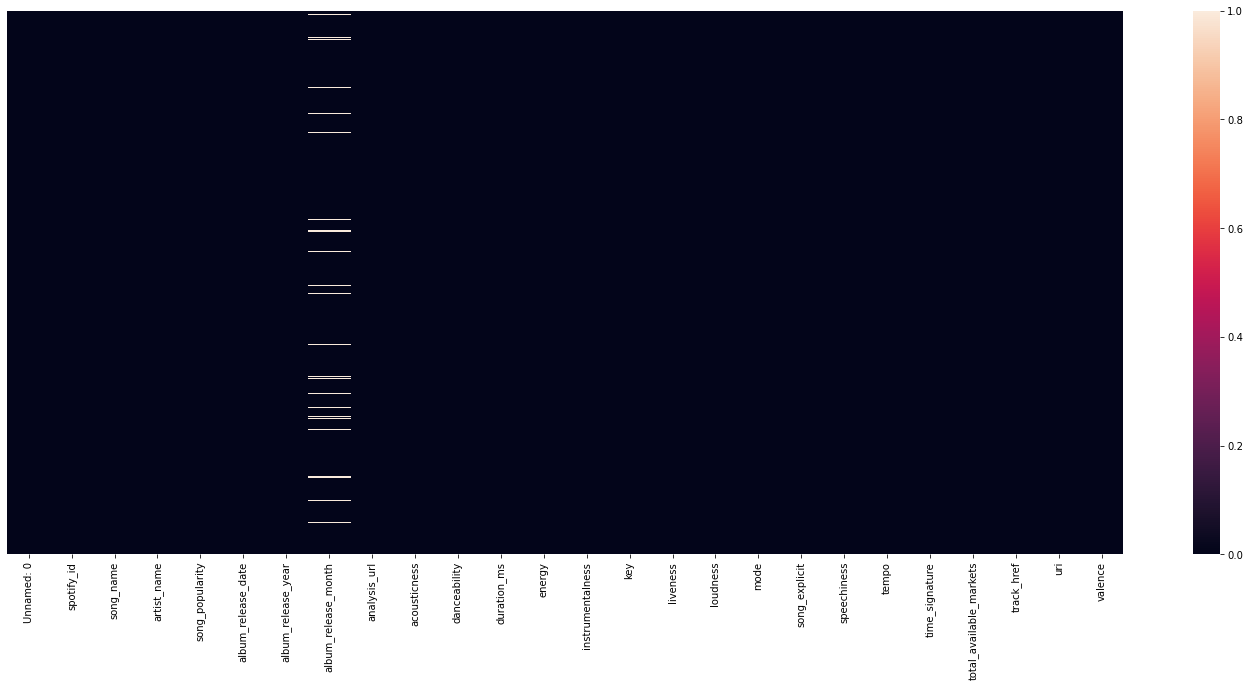

In [10]:
## Visualizing missing or null values

plt.figure(figsize = (25,10))
sns.heatmap(df.isnull(), yticklabels = False)

In [11]:
# Checking for unique values associated with each feature

print(df.nunique())

Unnamed: 0                 439893
spotify_id                 439889
song_name                  374226
artist_name                124471
song_popularity                98
album_release_date          10575
album_release_year            100
album_release_month            12
analysis_url               439889
acousticness                 5247
danceability                 1331
duration_ms                165456
energy                       2879
instrumentalness             5402
key                            12
liveness                     1764
loudness                    32160
mode                            2
song_explicit                   2
speechiness                  1652
tempo                      103286
time_signature                  5
total_available_markets       171
track_href                 439889
uri                        439889
valence                      2060
dtype: int64


In [12]:
# dropping unnamed column which seems to be a unique identifier or index but of no use to us.

df1 = df.drop(df.columns[0], axis=1)
df1.head()

,spotify_id,song_name,artist_name,song_popularity,album_release_date,album_release_year,album_release_month,analysis_url,acousticness,danceability,...,loudness,mode,song_explicit,speechiness,tempo,time_signature,total_available_markets,track_href,uri,valence
0,7lPN2DXiMsVn7XUKtOW1CS,drivers license,Olivia Rodrigo,100,2021-01-08,2021.0,1.0,https://api.spotify.com/v1/audio-analysis/7lPN...,0.72100,0.585,...,-8.761,1.0,True,0.0601,143.874,4.0,170,https://api.spotify.com/v1/tracks/7lPN2DXiMsVn...,spotify:track:7lPN2DXiMsVn7XUKtOW1CS,0.132
1,5QO79kh1waicV47BqGRL3g,Save Your Tears,The Weeknd,96,2020-03-20,2020.0,3.0,https://api.spotify.com/v1/audio-analysis/5QO7...,0.02120,0.680,...,-5.487,1.0,True,0.0309,118.051,4.0,170,https://api.spotify.com/v1/tracks/5QO79kh1waic...,spotify:track:5QO79kh1waicV47BqGRL3g,0.644
2,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,The Weeknd,96,2020-03-20,2020.0,3.0,https://api.spotify.com/v1/audio-analysis/0VjI...,0.00146,0.514,...,-5.934,1.0,False,0.0598,171.005,4.0,170,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,0.334
3,3tjFYV6RSFtuktYl3ZtYcq,Mood (feat. iann dior),24kGoldn,95,2020-07-24,2020.0,7.0,https://api.spotify.com/v1/audio-analysis/3tjF...,0.22100,0.700,...,-3.558,0.0,True,0.0369,90.989,4.0,170,https://api.spotify.com/v1/tracks/3tjFYV6RSFtu...,spotify:track:3tjFYV6RSFtuktYl3ZtYcq,0.756
4,27OeeYzk6klgBh83TSvGMA,WITHOUT YOU,The Kid LAROI,94,2020-11-06,2020.0,11.0,https://api.spotify.com/v1/audio-analysis/27Oe...,0.21300,0.662,...,-7.357,1.0,True,0.0299,93.005,4.0,170,https://api.spotify.com/v1/tracks/27OeeYzk6klg...,spotify:track:27OeeYzk6klgBh83TSvGMA,0.467


In [13]:
# Calculating missing or null values

df1.isnull().sum()   # Most of the nulls or missing values are associated with 2 columns 'album_release_year' and 'album_release_month'

spotify_id                     0
song_name                      2
artist_name                    9
song_popularity                0
album_release_date             0
album_release_year           203
album_release_month        19334
analysis_url                   0
acousticness                   0
danceability                   0
duration_ms                    0
energy                         0
instrumentalness               0
key                            0
liveness                       0
loudness                       0
mode                           0
song_explicit                  0
speechiness                    0
tempo                          0
time_signature                 0
total_available_markets        0
track_href                     0
uri                            0
valence                        0
dtype: int64

#### **Dropping few features, owing to limited computational capabilities:**


1. spotify_id (Act as an identifier and is safe to remove, for now)
2. song_name (removing for simplification, for now)
3. artist_name (Categorical in nature but the unique artists are almost '124471' - if we were to keep this information the dummies generated would be very high, so for the sake of simplicity we are ignoring it for now)
4. album_release_date (removing for simplification, for now)
5. album_release_year (removing for simplification, for now)
6. album_release_month (removing for simplification, for now)
7. analysis_url
8. track_href
9. uri 

In [14]:
df2 = df1.drop(['spotify_id', 'song_name', 'artist_name', 'album_release_date', 'album_release_year','album_release_month','analysis_url','track_href','uri'], axis = 1)

In [15]:
df2.head()

,song_popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,song_explicit,speechiness,tempo,time_signature,total_available_markets,valence
0,100,0.72100,0.585,242014.0,0.436,0.000013,10.0,0.1050,-8.761,1.0,True,0.0601,143.874,4.0,170,0.132
1,96,0.02120,0.680,215627.0,0.826,0.000012,0.0,0.5430,-5.487,1.0,True,0.0309,118.051,4.0,170,0.644
2,96,0.00146,0.514,200040.0,0.730,0.000095,1.0,0.0897,-5.934,1.0,False,0.0598,171.005,4.0,170,0.334
3,95,0.22100,0.700,140526.0,0.722,0.000000,7.0,0.2720,-3.558,0.0,True,0.0369,90.989,4.0,170,0.756
4,94,0.21300,0.662,161385.0,0.413,0.000000,0.0,0.1340,-7.357,1.0,True,0.0299,93.005,4.0,170,0.467


In [16]:
# Coverting 'duration_ms' feature into 'duration_min' i.e from ms into minutes (as it would make more sense)

df2['duration_min']=df2['duration_ms']/60000
df2 = df2.reindex(sorted(df2.columns), axis=1)
df2.head()

,acousticness,danceability,duration_min,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,song_explicit,song_popularity,speechiness,tempo,time_signature,total_available_markets,valence
0,0.72100,0.585,4.033567,242014.0,0.436,0.000013,10.0,0.1050,-8.761,1.0,True,100,0.0601,143.874,4.0,170,0.132
1,0.02120,0.680,3.593783,215627.0,0.826,0.000012,0.0,0.5430,-5.487,1.0,True,96,0.0309,118.051,4.0,170,0.644
2,0.00146,0.514,3.334000,200040.0,0.730,0.000095,1.0,0.0897,-5.934,1.0,False,96,0.0598,171.005,4.0,170,0.334
3,0.22100,0.700,2.342100,140526.0,0.722,0.000000,7.0,0.2720,-3.558,0.0,True,95,0.0369,90.989,4.0,170,0.756
4,0.21300,0.662,2.689750,161385.0,0.413,0.000000,0.0,0.1340,-7.357,1.0,True,94,0.0299,93.005,4.0,170,0.467


In [17]:
# Dropping ''duration_ms' - keeping 2 features giving same information may introduce multi-collinearity and could hamper our analysis

df2.drop(['duration_ms'], axis = 1, inplace = True)
df2.head()

,acousticness,danceability,duration_min,energy,instrumentalness,key,liveness,loudness,mode,song_explicit,song_popularity,speechiness,tempo,time_signature,total_available_markets,valence
0,0.72100,0.585,4.033567,0.436,0.000013,10.0,0.1050,-8.761,1.0,True,100,0.0601,143.874,4.0,170,0.132
1,0.02120,0.680,3.593783,0.826,0.000012,0.0,0.5430,-5.487,1.0,True,96,0.0309,118.051,4.0,170,0.644
2,0.00146,0.514,3.334000,0.730,0.000095,1.0,0.0897,-5.934,1.0,False,96,0.0598,171.005,4.0,170,0.334
3,0.22100,0.700,2.342100,0.722,0.000000,7.0,0.2720,-3.558,0.0,True,95,0.0369,90.989,4.0,170,0.756
4,0.21300,0.662,2.689750,0.413,0.000000,0.0,0.1340,-7.357,1.0,True,94,0.0299,93.005,4.0,170,0.467


In [18]:
# Converting 'song_explicit'from boolean into numeric form (binary)

df2['song_explicit'].replace({False:0,True:1},inplace=True)

In [19]:
df2.describe() # Performing some descriptive statisics on our udated DataFrame 

,acousticness,danceability,duration_min,energy,instrumentalness,key,liveness,loudness,mode,song_explicit,song_popularity,speechiness,tempo,time_signature,total_available_markets,valence
count,439893.000000,439893.000000,439893.000000,439893.000000,439893.000000,439893.000000,439893.000000,439893.000000,439893.000000,439893.000000,439893.000000,439893.000000,439893.000000,439893.000000,439893.000000,439893.000000
mean,0.332647,0.616870,3.556475,0.584848,0.188697,5.288957,0.209445,-9.960702,0.574342,0.211360,22.809390,0.191600,119.238750,3.878545,160.520076,0.475361
std,0.320389,0.178007,2.066553,0.249089,0.338787,3.606797,0.179297,5.897513,0.494443,0.408274,18.518437,0.252524,30.200554,0.546340,33.688941,0.253360
min,0.000000,0.000000,0.031067,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.039700,0.515000,2.566667,0.412000,0.000000,2.000000,0.098900,-12.383000,0.000000,0.000000,7.000000,0.042000,95.146000,4.000000,169.000000,0.275000
50%,0.224000,0.647000,3.323083,0.610000,0.000021,5.000000,0.131000,-8.409000,1.000000,0.000000,20.000000,0.071600,120.006000,4.000000,170.000000,0.472000
75%,0.587000,0.743000,4.122000,0.786000,0.148000,8.000000,0.272000,-5.949000,1.000000,0.000000,36.000000,0.232000,139.009000,4.000000,170.000000,0.673000
max,0.996000,0.994000,100.410783,1.000000,1.000000,11.000000,1.000000,5.285000,1.000000,1.000000,100.000000,0.972000,249.810000,5.000000,170.000000,1.000000


In [20]:
df2.shape # No. of features are reduced after dropping few

(439893, 16)

# Performing some Visual Analysis to see how our Data actually appears

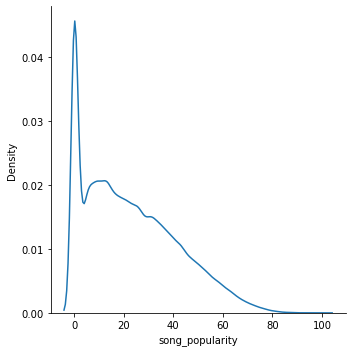

In [21]:
sns.displot(df2, x = 'song_popularity', kind = 'kde') # Population Distribution of our Target Variable shows most of the density of Data Points lies to the lower side.

In [22]:
df2.corr() # Looking to find any co-relations between different features

,acousticness,danceability,duration_min,energy,instrumentalness,key,liveness,loudness,mode,song_explicit,song_popularity,speechiness,tempo,time_signature,total_available_markets,valence
acousticness,1.000000,-0.284110,-0.065813,-0.637152,0.138082,-0.023441,-0.004675,-0.526285,0.038303,-0.160475,-0.067072,0.120617,-0.198493,-0.159032,-0.074791,-0.124760
danceability,-0.284110,1.000000,-0.114180,0.176870,-0.242311,0.022330,-0.121002,0.277236,-0.048211,0.255947,0.018864,0.197709,0.023292,0.167650,0.029939,0.412118
duration_min,-0.065813,-0.114180,1.000000,0.079004,0.090461,0.008930,-0.034779,0.069347,-0.014085,-0.100772,-0.030250,-0.187665,0.038249,0.045461,0.055012,-0.102922
energy,-0.637152,0.176870,0.079004,1.000000,-0.210131,0.036098,0.157845,0.775302,-0.045689,0.081744,0.084917,-0.155518,0.204518,0.166575,0.003388,0.294320
instrumentalness,0.138082,-0.242311,0.090461,-0.210131,1.000000,-0.008506,-0.115190,-0.375424,0.008847,-0.241757,-0.095371,-0.263045,-0.010087,-0.038664,0.064902,-0.277828
key,-0.023441,0.022330,0.008930,0.036098,-0.008506,1.000000,0.000377,0.024013,-0.198225,0.000885,-0.002019,0.008943,0.003756,0.009520,0.013275,0.031985
liveness,-0.004675,-0.121002,-0.034779,0.157845,-0.115190,0.000377,1.000000,0.031625,0.032413,-0.063836,-0.023016,0.230518,-0.044262,-0.051000,-0.146960,0.047408
loudness,-0.526285,0.277236,0.069347,0.775302,-0.375424,0.024013,0.031625,1.000000,-0.041974,0.153895,0.147129,-0.208774,0.187253,0.179725,0.032418,0.277513
mode,0.038303,-0.048211,-0.014085,-0.045689,0.008847,-0.198225,0.032413,-0.041974,1.000000,-0.036937,-0.014937,0.023430,-0.009226,-0.030452,-0.035965,-0.001425
song_explicit,-0.160475,0.255947,-0.100772,0.081744,-0.241757,0.000885,-0.063836,0.153895,-0.036937,1.000000,0.013380,0.081637,0.036244,0.093501,0.098528,-0.001238


<AxesSubplot:>

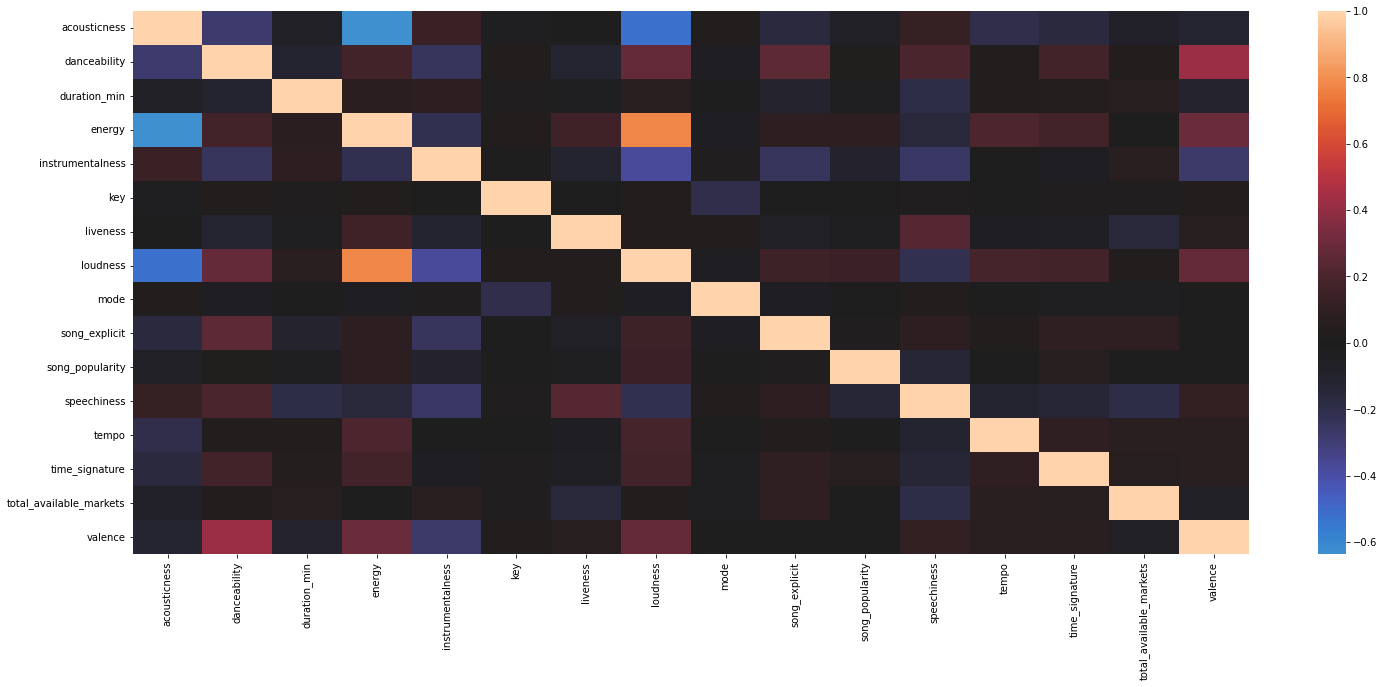

In [23]:
# Looking to find any co-relations between different features using Heat Map as our Visual Aid

plt.figure(figsize=(25,10))
sns.heatmap(df2.corr(),center = 0)

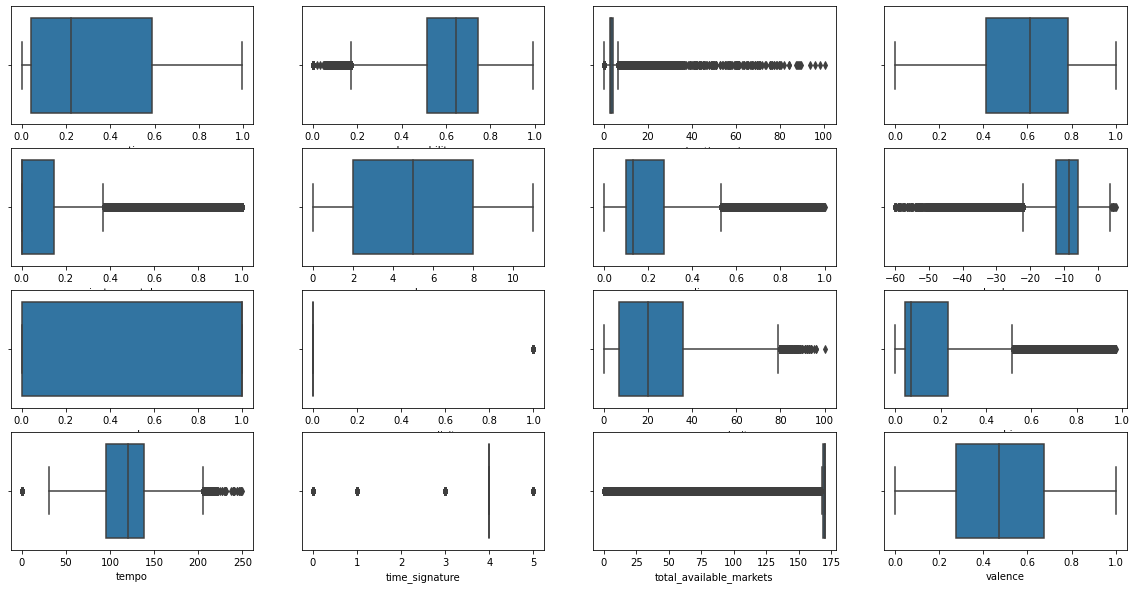

In [24]:
# Creating Boxplots to gaze into outliers (if any)

plt.figure(figsize = (20,10))

for i in range(len(df2.columns)):
  plt.subplot(4,4, i+1)
  sns.boxplot(df2[df2.columns[i]])

plt.show()

In [25]:
# Function for getting outliers

def get_outlier_counts_recordwise(df2, threshold):
  df2 = df2.copy()

  # Get z-scores for specified threshold
  threshold_z_score = stats.norm.ppf(threshold)

  # Get z-scores for each values in df2
  z_score_df = pd.DataFrame(np.abs(stats.zscore(df2)), columns = df2.columns)

  # compare df2 z_scores to the threshold and return the count of outliers in each column
  return (z_score_df > threshold_z_score).sum(axis = 0)


In [26]:
get_outlier_counts_recordwise(df2, 0.9999847) ## arrived at this threshold beacuse in this way we are not losing any information from Target Variable i.e. song_popularity

acousticness                   0
danceability                   0
duration_min                1871
energy                         0
instrumentalness               0
key                            0
liveness                    2039
loudness                    1881
mode                           0
song_explicit                  0
song_popularity                0
speechiness                    0
tempo                          7
time_signature              7930
total_available_markets    14502
valence                        0
dtype: int64

In [27]:
def Data_without_outliers(df2, threshold):
  df2 = df2.copy()

  # Get z-scores for specified threshold
  threshold_z_score = stats.norm.ppf(threshold)

  # Get z-scores for each values in df2
  z_score_df = pd.DataFrame(np.abs(stats.zscore(df2)), columns = df2.columns)
  z_score_df = z_score_df > threshold_z_score 

  # Get indices of the outliers
  outliers = z_score_df.sum(axis=1)
  outliers = outliers > 0
  outlier_indices = df2.index[outliers]

  # Drop Outliers
  df2 = df2.drop(outlier_indices, axis = 0).reset_index(drop = True)

  return df2

#### **Pre-Processing**

In [28]:
# Creating a funtion which gives pre-processed Data for Model building & Validation

def Preprocess_inputs(df2, outliers = True, threshold = 0.95):
  df2 = df2.copy()

  # Remove outliers if specified
  if outliers == False:
    df2 = Data_without_outliers(df2, threshold)

  # Split df into X and y
  y = df2['song_popularity'].copy()
  X = df2.drop('song_popularity', axis=1).copy()
    
  # Train-test split
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)
    
  # Scale X with a standard scaler
  scaler = StandardScaler()
  scaler.fit(X_train)
    
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)


  return X_train, X_test, y_train, y_test
    

In [29]:
# Creaing 2 sets of Train-Test Split: One with Outliers present (with default threshold value of 0.95) & other with capacity to fine tune the no. of outliers based on a certain threshold value

outlier_X_train, outlier_X_test, outlier_y_train, outlier_y_test = Preprocess_inputs(df2, outliers=True)

X_train, X_test, y_train, y_test = Preprocess_inputs(df2, outliers=False, threshold=0.99999999999999999) # mentioned threshold value ignores the outliers (if any) from our data - Shown in next cell

In [30]:
get_outlier_counts_recordwise(df2, 0.99999999999999999) # mentioned threshold value ignores the outliers (if any) from our data

acousticness               0
danceability               0
duration_min               0
energy                     0
instrumentalness           0
key                        0
liveness                   0
loudness                   0
mode                       0
song_explicit              0
song_popularity            0
speechiness                0
tempo                      0
time_signature             0
total_available_markets    0
valence                    0
dtype: int64

## **Training Models**

Applying Linear Regression to start things off

In [31]:
# With outliers

outlier_model = LinearRegression()
outlier_model.fit(outlier_X_train, outlier_y_train)

outlier_model_acc = outlier_model.score(outlier_X_test, outlier_y_test)

print("Test Accuracy (Outliers): {:.5f}%".format(outlier_model_acc * 100))

Test Accuracy (Outliers): 4.91921%


In [32]:
# Without outliers

model = LinearRegression()
model.fit(X_train, y_train)

model_acc = model.score(X_test, y_test)

print("Test Accuracy (No Outliers): {:.5f}%".format(model_acc * 100))

Test Accuracy (No Outliers): 4.91921%


## Our first models failed miserably but lets keep trying

In [33]:
# Converting Dummies for few categorical features to see if performance of our model improves

df3 = pd.get_dummies(df2, columns = ['key', 'time_signature'], drop_first = True)
df3.head()

,acousticness,danceability,duration_min,energy,instrumentalness,liveness,loudness,mode,song_explicit,song_popularity,...,key_6.0,key_7.0,key_8.0,key_9.0,key_10.0,key_11.0,time_signature_1.0,time_signature_3.0,time_signature_4.0,time_signature_5.0
0,0.72100,0.585,4.033567,0.436,0.000013,0.1050,-8.761,1.0,1,100,...,0,0,0,0,1,0,0,0,1,0
1,0.02120,0.680,3.593783,0.826,0.000012,0.5430,-5.487,1.0,1,96,...,0,0,0,0,0,0,0,0,1,0
2,0.00146,0.514,3.334000,0.730,0.000095,0.0897,-5.934,1.0,0,96,...,0,0,0,0,0,0,0,0,1,0
3,0.22100,0.700,2.342100,0.722,0.000000,0.2720,-3.558,0.0,1,95,...,0,1,0,0,0,0,0,0,1,0
4,0.21300,0.662,2.689750,0.413,0.000000,0.1340,-7.357,1.0,1,94,...,0,0,0,0,0,0,0,0,1,0


In [34]:
outlier_X_train, outlier_X_test, outlier_y_train, outlier_y_test = Preprocess_inputs(df3, outliers=True)

X_train, X_test, y_train, y_test = Preprocess_inputs(df3, outliers=False, threshold=0.9999999999999999)

In [35]:
# With outliers

outlier_model = LinearRegression()
outlier_model.fit(outlier_X_train, outlier_y_train)

outlier_model_acc = outlier_model.score(outlier_X_test, outlier_y_test)

print("Test Accuracy (Outliers): {:.5f}%".format(outlier_model_acc * 100))

Test Accuracy (Outliers): 5.04390%


In [36]:
# Without outliers

model = LinearRegression()
model.fit(X_train, y_train)

model_acc = model.score(X_test, y_test)

print("Test Accuracy (No Outliers): {:.5f}%".format(model_acc * 100))

Test Accuracy (No Outliers): 5.25043%


### Changing our strategy to see if we could classify our Target Variable into Popular (1) or Not-Popular (0) classes, instead of getting a numeric rank.

#### Assumptions:

song_popularity > 50 as Popular

song_popularity <= 50 as Not-Popular

In [37]:
df3['song_popularity'] = np.where(df3['song_popularity'] > 50, 1, 0)

In [38]:
df3.head()

,acousticness,danceability,duration_min,energy,instrumentalness,liveness,loudness,mode,song_explicit,song_popularity,...,key_6.0,key_7.0,key_8.0,key_9.0,key_10.0,key_11.0,time_signature_1.0,time_signature_3.0,time_signature_4.0,time_signature_5.0
0,0.72100,0.585,4.033567,0.436,0.000013,0.1050,-8.761,1.0,1,1,...,0,0,0,0,1,0,0,0,1,0
1,0.02120,0.680,3.593783,0.826,0.000012,0.5430,-5.487,1.0,1,1,...,0,0,0,0,0,0,0,0,1,0
2,0.00146,0.514,3.334000,0.730,0.000095,0.0897,-5.934,1.0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0.22100,0.700,2.342100,0.722,0.000000,0.2720,-3.558,0.0,1,1,...,0,1,0,0,0,0,0,0,1,0
4,0.21300,0.662,2.689750,0.413,0.000000,0.1340,-7.357,1.0,1,1,...,0,0,0,0,0,0,0,0,1,0


#### Applying Classification Models

In [40]:
# With outliers - Logistic Regression

outlier_log_model = LogisticRegression(n_jobs = -1)
outlier_log_model.fit(outlier_X_train, outlier_y_train)
outlier_log_acc = outlier_log_model.score(outlier_X_test, outlier_y_test)
print("Logistic Regression Accuracy:", outlier_log_acc)

Logistic Regression Accuracy: 0.13572987390882638


In [82]:
# With outliers - KNeighborsClassifier

outlier_knn_model = KNeighborsClassifier(n_jobs = -1)
outlier_knn_model.fit(outlier_X_train, outlier_y_train)
outlier_knn_acc = outlier_knn_model.score(outlier_X_test, outlier_y_test)
print("K-Nearest-Neighbors Accuracy:", outlier_knn_acc)

K-Nearest-Neighbors Accuracy: 0.09331049951503395


In [ ]:
# With outliers - Support Vector Classifier

outlier_svm_model = SVC(n_jobs=-1)
outlier_svm_model.fit(outlier_X_train, outlier_y_train)
outlier_svm_acc = outlier_svm_model.score(outlier_X_test, outlier_y_test)
print("Support Vector Machine Accuracy:", outlier_svm_acc)

# Was taking longer time so had to interrput 

### Our models are still performing poorly; need to change our technique a bit

#### Lets see how our Target Variable is now distributed

In [41]:
df3['song_popularity'].value_counts()

0    398703
1     41190
Name: song_popularity, dtype: int64

In [42]:
# Calculating fraction of records which are labelled as popular (Minority Class)

(40190/372615)*100

10.785931859962696

#### Target Variable is highly imbalanced and biased towards majority class which represents class '0' i.e Not-Popular

In [43]:
X_train, X_test, y_train, y_test = Preprocess_inputs(df3, outliers=False, threshold=0.9999999999999999)

In [44]:
# Treating imbalance of Target variable using SMOTE i.e. synthetic minority oversampling techniques

sm = SMOTE(random_state=12)

X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train) # We can only apply it to training sets of data, we can't apply it to test set as it would mis-represent our data, as we are creating synthetic samples.

In [45]:
# how our target variable looked before SMOTE 

print (y_train.value_counts())

0    278638
1     28897
Name: song_popularity, dtype: int64


In [46]:
# how our target variable looks after SMOTE 

print(y_train_sm.value_counts())

0    278638
1    278638
Name: song_popularity, dtype: int64


**Using these transformed training variables**

In [47]:
# Logistic Regression

log_model = LogisticRegression(n_jobs=-1)
log_model.fit(X_train_sm, y_train_sm)
log_acc = outlier_log_model.score(X_test, y_test)
print("Logistic Regression Accuracy:", log_acc)

Logistic Regression Accuracy: 0.8823841823341072


Voila!! Our model perfomance increased significantly i.e. it rose up to 88.23%.

In [48]:
# KNeighborsClassifier

outlier_knn_model = KNeighborsClassifier(n_jobs=-1)
outlier_knn_model.fit(X_train_sm, y_train_sm)
outlier_knn_acc = outlier_knn_model.score(X_test, y_test)
print("K-Nearest-Neighbors Accuracy:", outlier_knn_acc)

KeyboardInterrupt: 

Was trying for other modelling algorithms but due to hardware capabilities it was taking long time so had to interrput in between.

###  Limitations: 

#### Due to limited computational capabilities was only able to work with limited number of features to keep our models simple and also couldn't utiize Ensemble Techniques and Hyper Paramter Tuning (using Grid Search CV).  

### Scope: 

#### Could look into more sophesticated techniques such as Neural Networks, Ensemble techniques to further enhance the performance of our classification models.

### Conclusion: 

#### Was able to acheive almost 88.23% accuracy in classifying our Target Variable, using Logistic Regression after using SMOTE (to counter imbalance of the Target variable), which was a significant increase compared to previous versions of the models built.